In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('hotel_bookings_data.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [5]:
na_nums = ['children','agent','company']
data[na_nums].describe()

,children,agent,company
count,119386.000000,103050.000000,6797.000000
mean,0.103890,86.693382,189.266735
std,0.398561,110.774548,131.655015
min,0.000000,1.000000,6.000000
25%,0.000000,9.000000,62.000000
50%,0.000000,14.000000,179.000000
75%,0.000000,229.000000,270.000000
max,10.000000,535.000000,543.000000


In [6]:
data[['city']].describe()

,city
count,118902
unique,177
top,Kota Denpasar
freq,48590


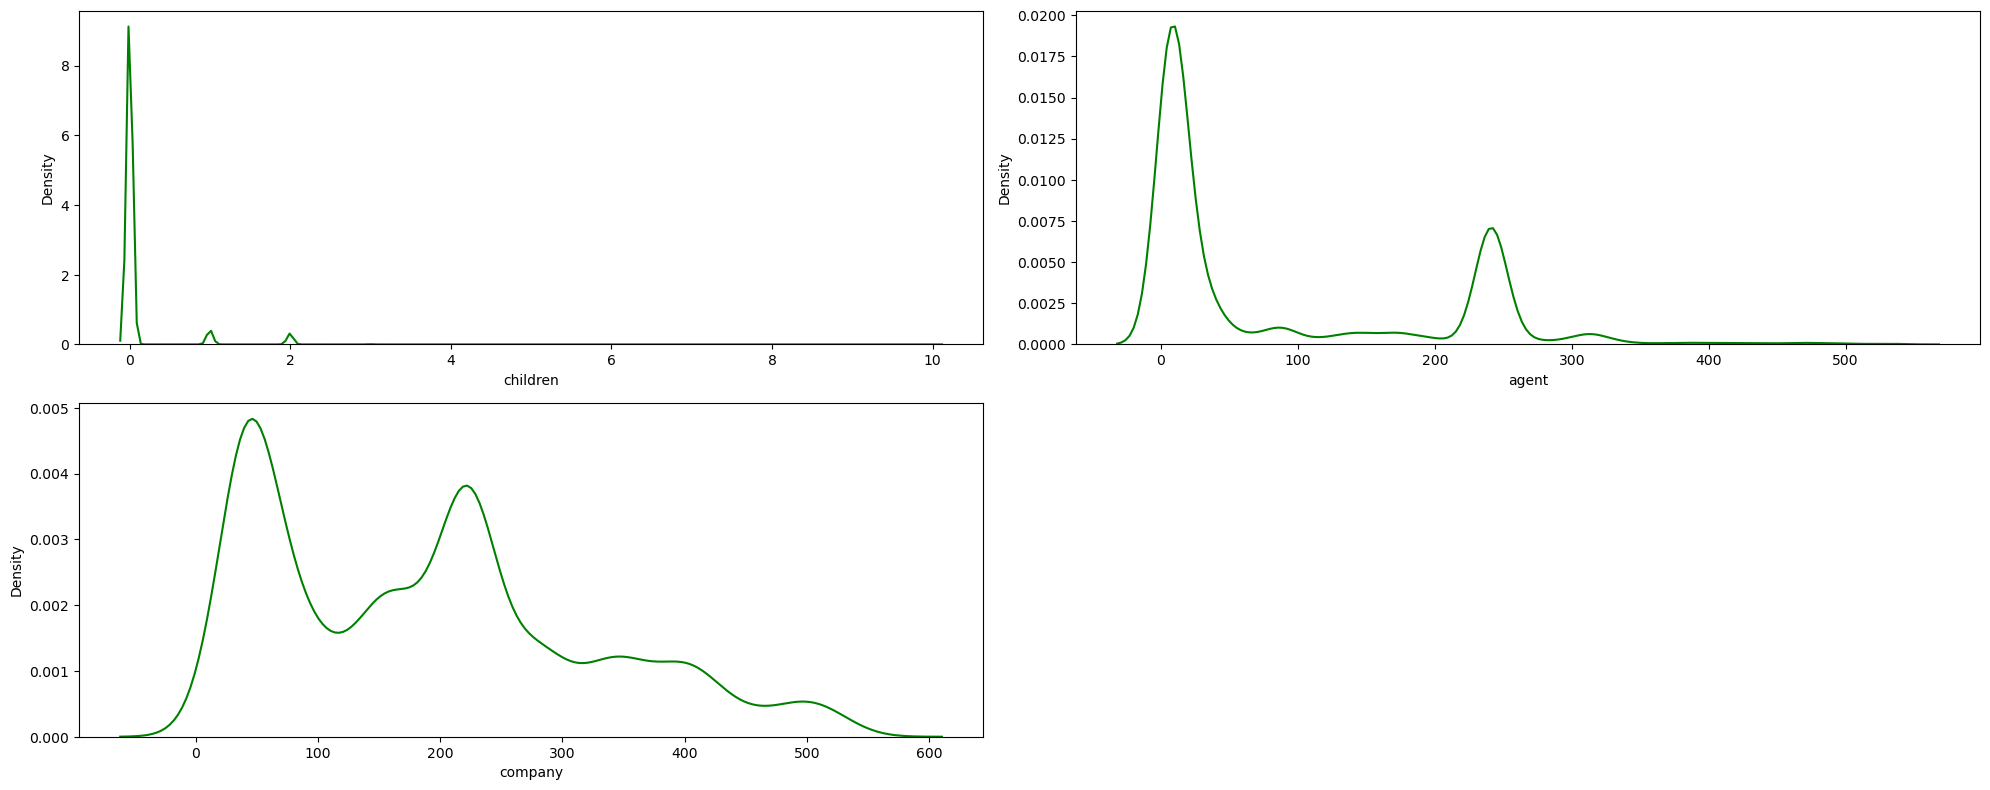

In [7]:
plt.figure(figsize=(20,8))
for i in range(0,len(na_nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data[na_nums[i]], color='green')
    plt.tight_layout()

## Handling Missing Value

In [8]:
data['agent'].fillna(data['agent'].median(), inplace=True)
data['children'].fillna(data['children'].median(), inplace=True)
data = data.drop('company', axis=1)
data['city'].fillna(data['city'].mode()[0], inplace=True)

In [9]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

## Handling Undefined Value

In [10]:
cats = data.select_dtypes(include=['object'])

In [11]:
for col in data:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count kolom is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64

Value count kolom lead_time:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

Value count kolom arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

Value count kolom arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count kolom arrival_date_week_number:
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15

In [12]:
cols_replace = ['meal', 'market_segment', 'distribution_channel']

In [13]:
for col in cols_replace:
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace({'Undefined': mode_value})

## Drop Unused Value

In [14]:
data['total_guest'] = data[['adults', 'children', 'babies']].sum(axis=1)

data_filter = data[['total_guest', 'adults', 'children', 'babies', 'is_canceled', 'reservation_status', 'customer_type']]
data_filter

,total_guest,adults,children,babies,is_canceled,reservation_status,customer_type
0,2.0,2,0.0,0,0,Check-Out,Personal
1,2.0,2,0.0,0,0,Check-Out,Personal
2,1.0,1,0.0,0,0,Check-Out,Personal
3,1.0,1,0.0,0,0,Check-Out,Personal
4,2.0,2,0.0,0,0,Check-Out,Personal
...,...,...,...,...,...,...,...
119385,2.0,2,0.0,0,0,Check-Out,Personal
119386,3.0,3,0.0,0,0,Check-Out,Personal
119387,2.0,2,0.0,0,0,Check-Out,Personal
119388,2.0,2,0.0,0,0,Check-Out,Personal


In [15]:
nol_guest = data_filter[data_filter['total_guest'] == 0]
nol_guest

,total_guest,adults,children,babies,is_canceled,reservation_status,customer_type
2224,0.0,0,0.0,0,0,Check-Out,Family
2409,0.0,0,0.0,0,0,Check-Out,Personal
3181,0.0,0,0.0,0,0,Check-Out,Family
3684,0.0,0,0.0,0,0,Check-Out,Family
3708,0.0,0,0.0,0,0,Check-Out,Family
...,...,...,...,...,...,...,...
115029,0.0,0,0.0,0,0,Check-Out,Personal
115091,0.0,0,0.0,0,0,Check-Out,Personal
116251,0.0,0,0.0,0,0,Check-Out,Personal
116534,0.0,0,0.0,0,0,Check-Out,Family


In [16]:
much_guest = data_filter[data_filter['total_guest'] > 5]
much_guest

,total_guest,adults,children,babies,is_canceled,reservation_status,customer_type
328,12.0,2,10.0,0,1,No-Show,Contract
1539,40.0,40,0.0,0,1,Canceled,Bussiness
1587,26.0,26,0.0,0,1,Canceled,Bussiness
1643,50.0,50,0.0,0,1,Canceled,Bussiness
1752,26.0,26,0.0,0,1,Canceled,Bussiness
1884,26.0,26,0.0,0,1,Canceled,Bussiness
1917,27.0,27,0.0,0,1,Canceled,Bussiness
1962,27.0,27,0.0,0,1,Canceled,Bussiness
2003,26.0,26,0.0,0,1,Canceled,Bussiness
2164,26.0,26,0.0,0,1,Canceled,Bussiness


In [17]:
data.drop(data[data['total_guest'] == 0].index, inplace=True)
data.drop(data[data['children'] > 5].index, inplace=True)
data.drop(data[data['babies'] > 5].index, inplace=True)

## Analisis Jumlah Pemesanan Hotel per Bulan berdasarkan tipe Hotel

In [18]:
# comparison of the hotel bookings each month by type of hotel
# separate Resort and City hotel
rh = data.loc[(data['hotel'] == 'Resort Hotel')]
ch = data.loc[(data['hotel'] == 'City Hotel')]


resort_monthly_booking = rh.groupby(['arrival_date_month', 'arrival_date_year']).agg({'hotel' : 'count'})
city_monthly_booking = ch.groupby(['arrival_date_month', 'arrival_date_year']).agg({'hotel' : 'count'})

resort_booking_data = pd.DataFrame({'month' : list(resort_monthly_booking.index.get_level_values(0)),
                                    'year' : list(resort_monthly_booking.index.get_level_values(1)),
                                    'hotel' : 'Resort Hotel',
                                    'guests': list(resort_monthly_booking.values)})
city_booking_data = pd.DataFrame({'month' : list(city_monthly_booking.index.get_level_values(0)),
                                  'year' : list(resort_monthly_booking.index.get_level_values(1)),
                                    'hotel' : 'City Hotel',
                                    'guests': list(city_monthly_booking.values)})
full_booking_data = pd.concat([resort_booking_data, city_booking_data], ignore_index=True)
full_booking_data['guests'] = full_booking_data['guests'].apply(lambda x: x[0])
full_booking_data

,month,year,hotel,guests
0,April,2018,Resort Hotel,1519
1,April,2019,Resort Hotel,1583
2,August,2018,Resort Hotel,1369
3,August,2019,Resort Hotel,1675
4,December,2017,Resort Hotel,1569
5,December,2018,Resort Hotel,1984
6,February,2017,Resort Hotel,1264
7,February,2018,Resort Hotel,1381
8,January,2017,Resort Hotel,1104
9,January,2018,Resort Hotel,1331


In [19]:
# before normalize the data, remove the year column to show the data comparation by month
resort_monthly_booking = rh.groupby(['arrival_date_month']).agg({'hotel' : 'count'})
city_monthly_booking = ch.groupby(['arrival_date_month']).agg({'hotel' : 'count'})

resort_booking_data = pd.DataFrame({'month' : list(resort_monthly_booking.index.get_level_values(0)),
                                    'hotel' : 'Resort Hotel',
                                    'guests': list(resort_monthly_booking.values)})
city_booking_data = pd.DataFrame({'month' : list(city_monthly_booking.index.get_level_values(0)),
                                    'hotel' : 'City Hotel',
                                    'guests': list(city_monthly_booking.values)})
full_booking_data = pd.concat([resort_booking_data, city_booking_data], ignore_index=True)
full_booking_data['guests'] = full_booking_data['guests'].apply(lambda x: x[0])
full_booking_data

# dataset contains September and October date from 3 years, the other month from 2 years. Normalize data:
full_booking_data.loc[(full_booking_data["month"] == "September") | (full_booking_data["month"] == "October"),
                    "guests"] /= 3
full_booking_data.loc[~((full_booking_data["month"] == "September") | (full_booking_data["month"] == "October")),
                    "guests"] /= 2

In [20]:
# order data by month
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
full_booking_data['month'] = pd.Categorical(full_booking_data['month'], categories=ordered_month, ordered=True)
full_booking_data = full_booking_data.sort_values(['month'])
full_booking_data

,month,hotel,guests
4,January,Resort Hotel,1217.500000
16,January,City Hotel,2168.000000
3,February,Resort Hotel,1322.500000
15,February,City Hotel,2057.000000
7,March,Resort Hotel,1095.500000
19,March,City Hotel,1864.500000
0,April,Resort Hotel,1551.000000
12,April,City Hotel,2475.000000
20,May,City Hotel,3217.000000
8,May,Resort Hotel,1667.000000


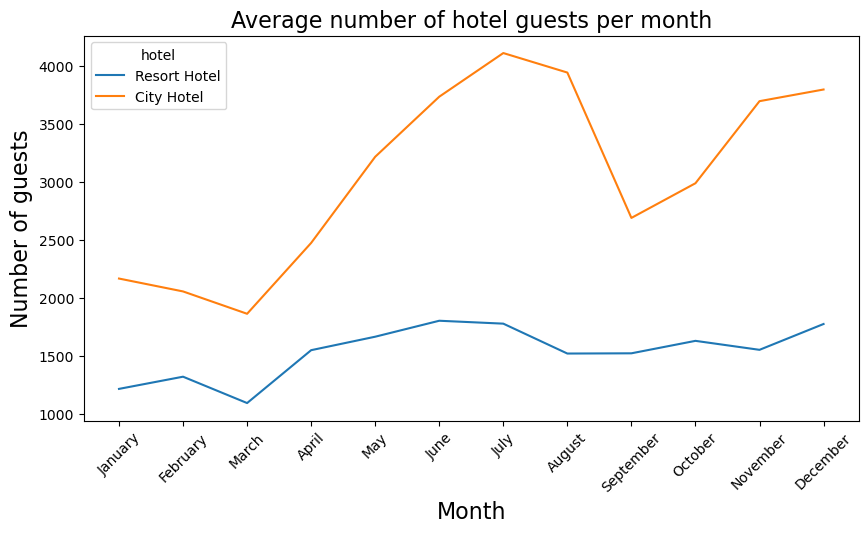

In [21]:
# create plot
plt.figure(figsize=(10, 5))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_booking_data)
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

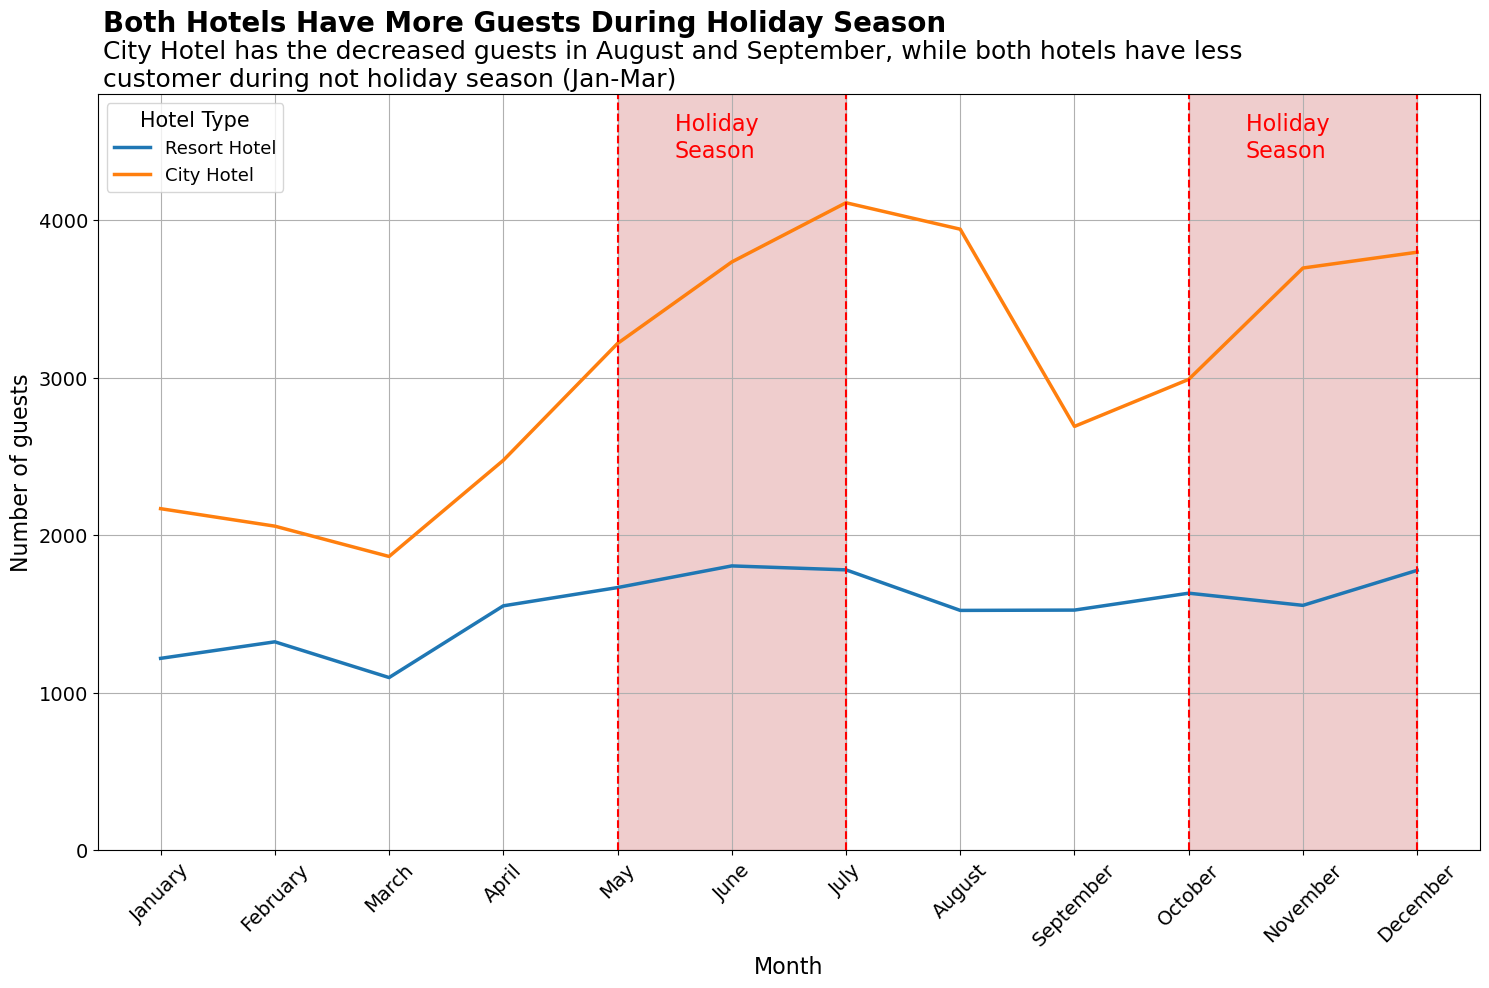

In [23]:
# create plot
plt.figure(figsize=(15, 10))
sns.lineplot(x = "month", y="guests", hue="hotel", size="hotel", sizes=(2.5, 2.5), data=full_booking_data)
# plt.title("Average number of hotel guests per month", fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xlabel("Month", fontsize=16) # mengatur title pada x-axis 
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16) # mengatur title pada y-axis
plt.ylim(0, 4800) # membatasi y axis

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada

plt.text(x=-0.5, y=5200, s="Both Hotels Have More Guests During Holiday Season", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=4850, s="City Hotel has the decreased guests in August and September, while both hotels have less \ncustomer during not holiday season (Jan-Mar)", 
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
# plt.savefig('fig/investigate_hotel_business_v01.png', dpi=200); # menyimpan gambar

## Analisa Pengaruh Durasi Menginap terhadap tingkat Pembatalan Pemesanan Hotel

In [25]:
# make new column for total stay at the hotels
data['total_night'] = data['stays_in_weekend_nights'] + data['stays_in_weekdays_nights']

In [26]:
filter_canceled = data['is_canceled'] == 1
filter_no_canceled = data['is_canceled'] == 0
data_cancel = data[filter_canceled]
data_no_cancel = data[filter_no_canceled]

stay_nc = data_no_cancel.groupby(['total_night', 'hotel']).agg('count').reset_index()
stay_nc = stay_nc.iloc[:, :3]
stay_nc = stay_nc.rename(columns={'is_canceled':'number_of_stays'})
print(stay_nc)

stay_c = data_cancel.groupby(['total_night', 'hotel']).agg('count').reset_index()
stay_c = stay_c.iloc[:, :3]
stay_c = stay_c.rename(columns={'is_canceled':'number_of_stays'})
# stay_cancel

    total_night         hotel  number_of_stays
0             0    City Hotel              251
1             0  Resort Hotel              371
2             1    City Hotel             9155
3             1  Resort Hotel             6579
4             2    City Hotel            10982
..          ...           ...              ...
57           46  Resort Hotel                1
58           48    City Hotel                1
59           56  Resort Hotel                1
60           60  Resort Hotel                1
61           69  Resort Hotel                1

[62 rows x 3 columns]


<AxesSubplot:xlabel='total_night', ylabel='number_of_stays'>

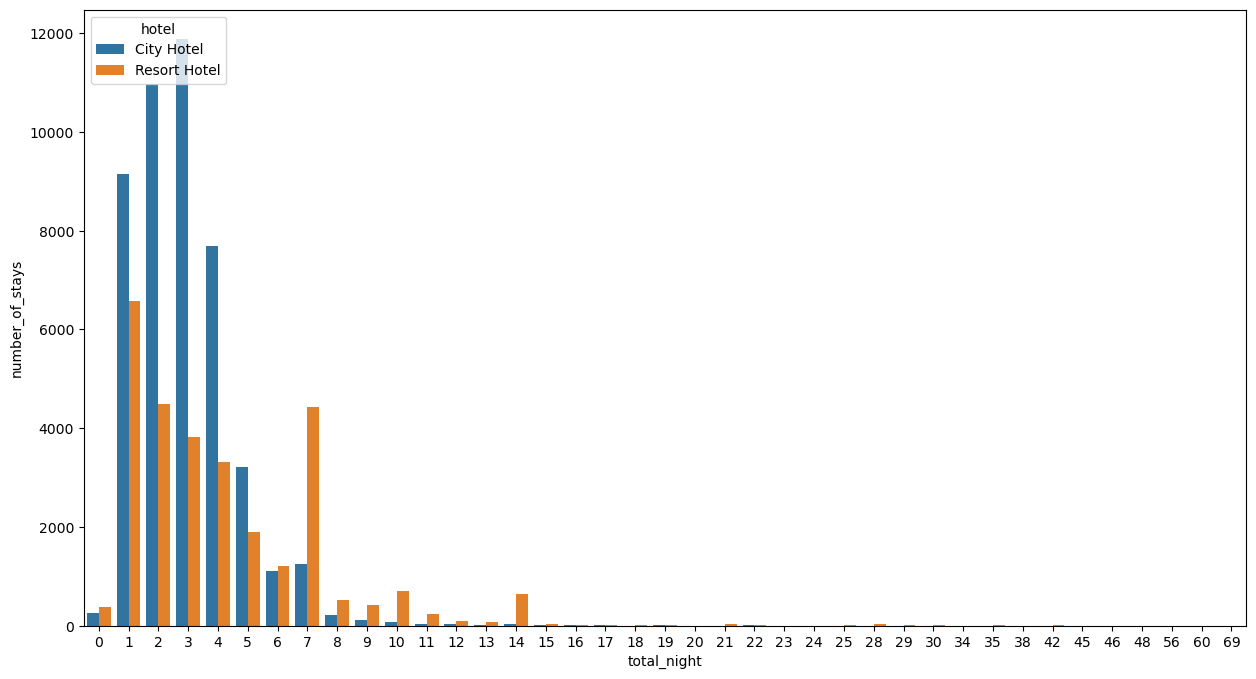

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data=stay_nc, x='total_night', y='number_of_stays', hue='hotel')

In [28]:
stay_nc.describe()

,total_night,number_of_stays
count,62.000000,62.000000
mean,18.403226,1209.822581
std,15.421360,2694.133229
min,0.000000,1.000000
25%,7.250000,2.000000
50%,15.000000,22.500000
75%,23.000000,599.750000
max,69.000000,11888.000000


In [29]:
# because of the total_night values above 14 for each are small, rename them into one value = 15
stay_nc_grouped = stay_nc.groupby(['total_night', 'hotel'])['number_of_stays'].sum().reset_index()
stay_nc_15 = stay_nc_grouped[stay_nc_grouped['total_night'] >= 15].groupby(['hotel'])['number_of_stays'].sum().reset_index()
stay_nc_15['total_night'] = 15
stay_nc_15 = stay_nc_15.reindex(columns=['total_night', 'hotel', 'number_of_stays'])
print(stay_nc_15)

# do the same for the canceled
stay_c_grouped = stay_c.groupby(['total_night', 'hotel'])['number_of_stays'].sum().reset_index()
stay_c_15 = stay_c_grouped[stay_c_grouped['total_night'] >= 15].groupby(['hotel'])['number_of_stays'].sum().reset_index()
stay_c_15['total_night'] = 15
stay_c_15 = stay_c_15.reindex(columns=['total_night', 'hotel', 'number_of_stays'])
# stay_c_15

   total_night         hotel  number_of_stays
0           15    City Hotel               35
1           15  Resort Hotel              152


In [30]:
# combine into earlier dataframe
stay_nc = stay_nc[stay_nc['total_night'] <= 14]
stay_nc = stay_nc.append(stay_nc_15, ignore_index=True)

stay_c = stay_c[stay_c['total_night'] <= 14]
stay_c = stay_c.append(stay_c_15, ignore_index=True)

C:\Users\maela\AppData\Local\Temp\ipykernel_7540\1777147654.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stay_nc = stay_nc.append(stay_nc_15, ignore_index=True)
C:\Users\maela\AppData\Local\Temp\ipykernel_7540\1777147654.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stay_c = stay_c.append(stay_c_15, ignore_index=True)


<AxesSubplot:xlabel='total_night', ylabel='number_of_stays'>

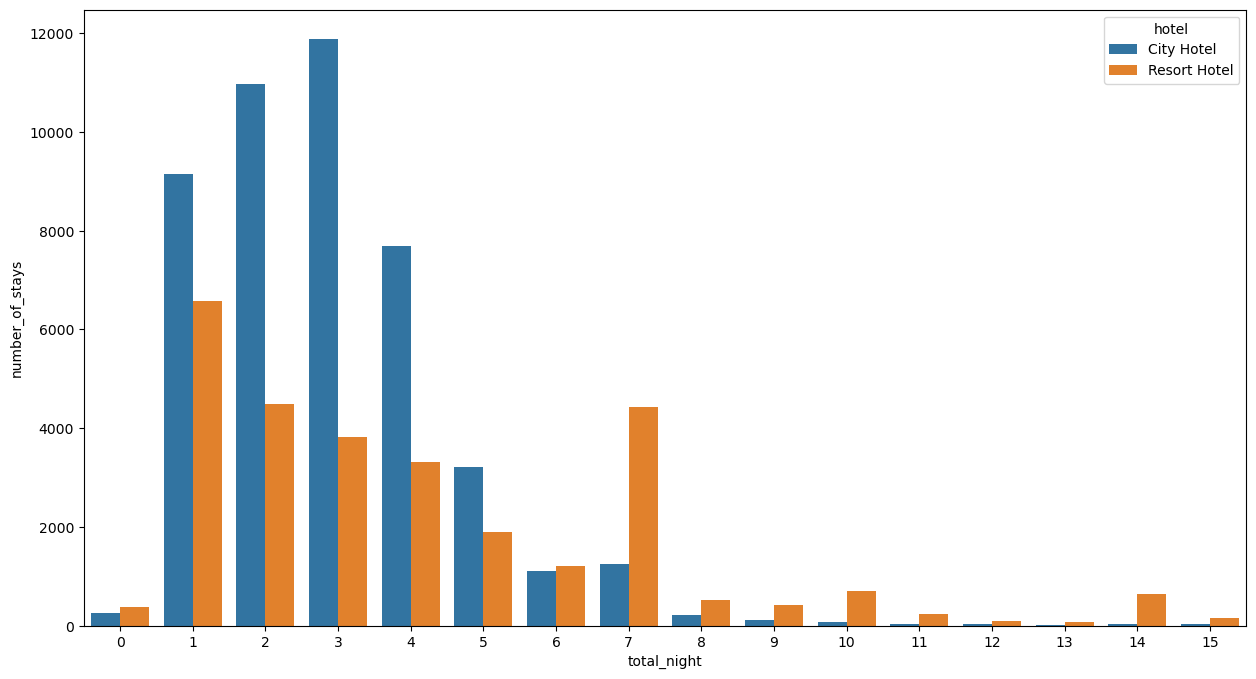

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=stay_nc, x='total_night', y='number_of_stays', hue='hotel')

In [32]:
# comparison of canceled booking to number of stay
stay_nc = stay_nc.rename(columns={'number_of_stays' : 'number_of_stays_nc'})
stay_c = stay_c.rename(columns={'number_of_stays' : 'number_of_stays_c'})

col = stay_c['number_of_stays_c']
stay = stay_nc.copy()
stay = pd.concat([stay, col], axis=1)
stay

,total_night,hotel,number_of_stays_nc,number_of_stays_c
0,0,City Hotel,251,13
1,0,Resort Hotel,371,10
2,1,City Hotel,9155,4103
3,1,Resort Hotel,6579,1168
4,2,City Hotel,10982,10432
5,2,Resort Hotel,4488,1729
6,3,City Hotel,11888,9482
7,3,Resort Hotel,3828,1865
8,4,City Hotel,7694,4853
9,4,Resort Hotel,3321,1505


In [33]:
# add new column >> cancelation rate
stay['cancelation_rate'] = (stay['number_of_stays_c'] / (stay['number_of_stays_nc'] + stay['number_of_stays_c'])) * 100

<Figure size 2000x1200 with 0 Axes>

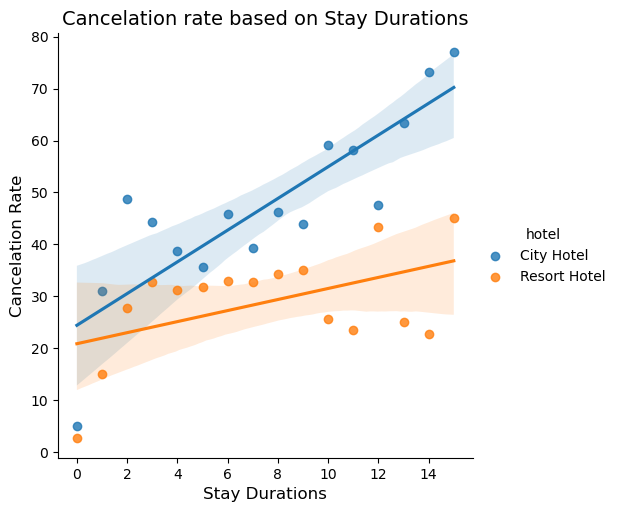

In [34]:
# create plot
plt.figure(figsize=(20, 12))
sns.lmplot(x = "total_night", y="cancelation_rate", hue="hotel", data=stay)
plt.title("Cancelation rate based on Stay Durations", fontsize=14)
plt.xlabel("Stay Durations", fontsize=12)
plt.ylabel("Cancelation Rate", fontsize=12)
plt.show()

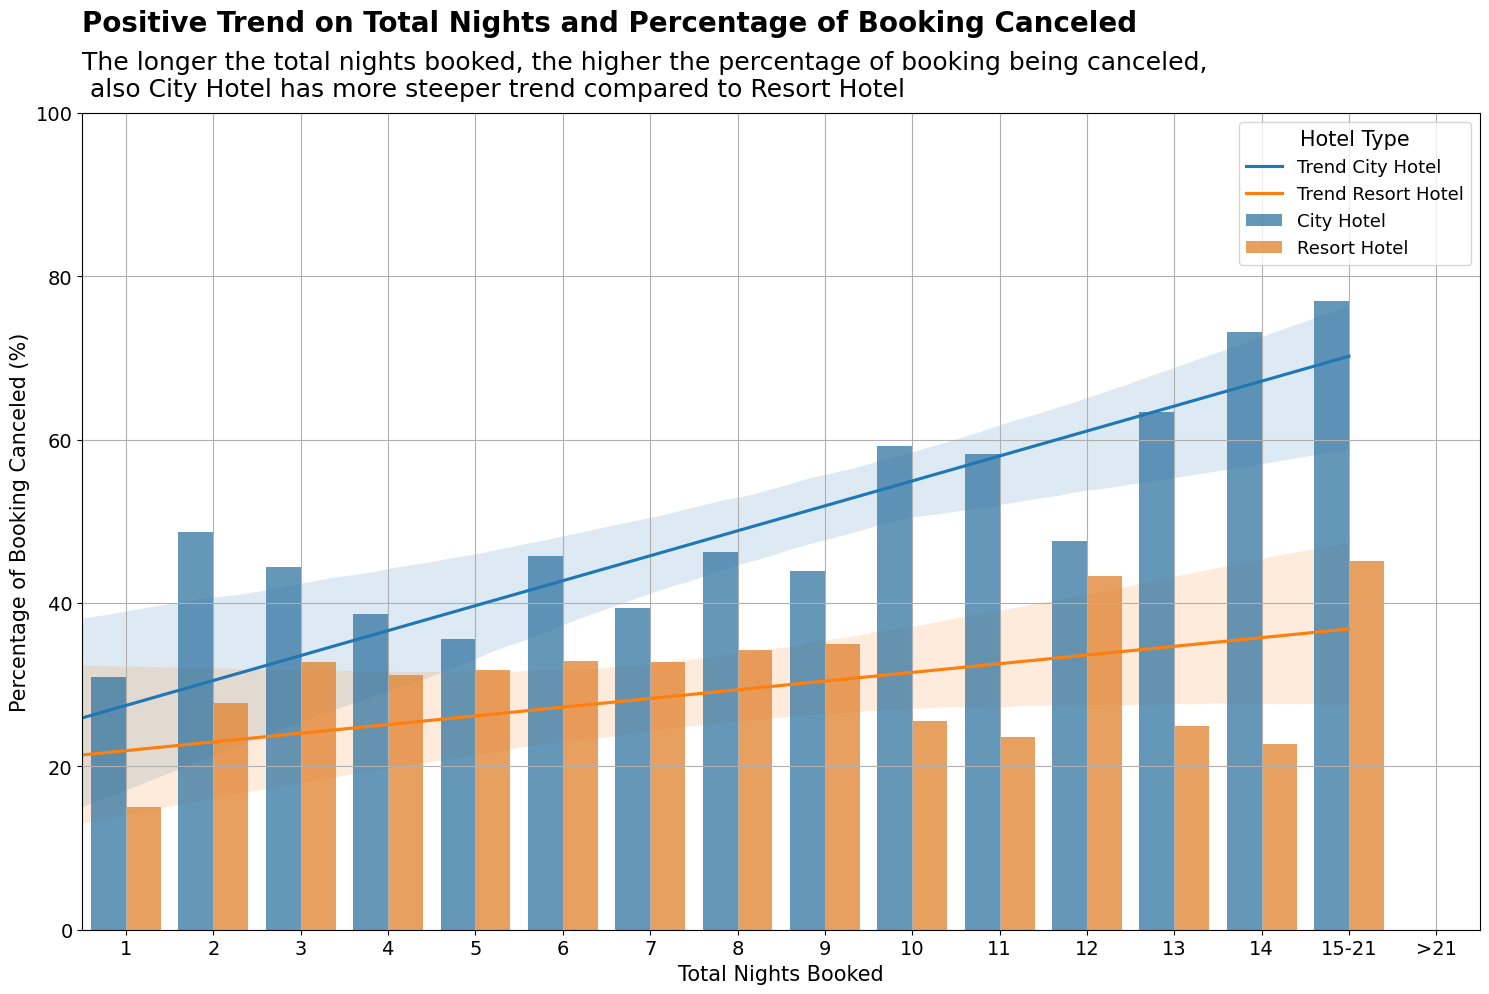

In [37]:
plt.figure(figsize=(15,10))
sns.regplot(x='total_night', y='cancelation_rate', data=stay[stay['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='total_night', y='cancelation_rate', data=stay[stay['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='total_night', y='cancelation_rate', hue='hotel', data=stay, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) # mengatur customized-label pada x-axis
plt.xlabel('Total Nights Booked', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 100) # membatasi y axis
plt.xlim(0.5, 16.5) # membatasi x axis

plt.text(x=0.5, y=110, s="Positive Trend on Total Nights and Percentage of Booking Canceled", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=0.5, y=102, s="The longer the total nights booked, the higher the percentage of booking being canceled, \n also City Hotel has more steeper trend compared to Resort Hotel", 
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
# plt.savefig('fig/investigate_hotel_business_v02.png', dpi=200); # menyimpan gambar

## Analisa Pengaruh Jarak Waktu Pemesanan terhadap Tingkat Pembatalan Pemesanan Hotel

In [38]:
# new category from lead time
data['lead_time'].describe()

count    119207.000000
mean        104.110983
std         106.876183
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

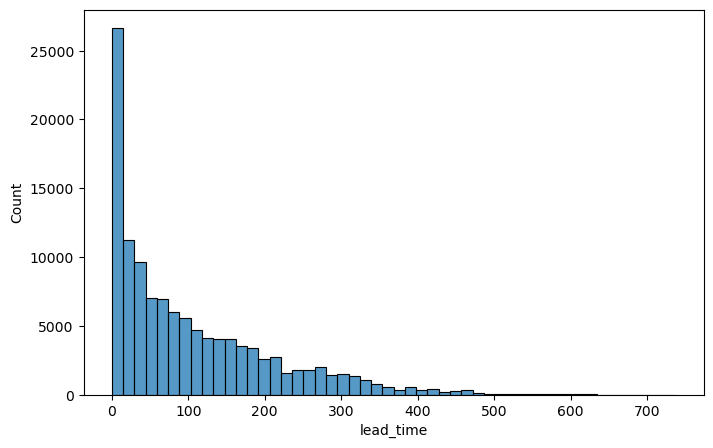

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='lead_time', bins=50)

Berdasarkan pada histogram di atas, dapat dilihat bahwa persebaran data terlihat right-skewed. Oleh karena itu dilakukan pengelompokkan untuk membuat persebarannya menjadi lebih merata. Jarak waktu pemesanan yang mulanya dalam satuan harian, dikelompokkan menjadi satuan bulanan yakni per 30 hari.

In [41]:
# make new column for lead_time_categories
data['lead_times'] = np.where(data['lead_time'] > 400, 401, data['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(data['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
data['lead_time_categories'] = pd.cut(data['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

In [125]:
# # make new column for lead_time_categories
# lead_time = data['lead_time'].values.reshape(-1,1)

# from sklearn.preprocessing import KBinsDiscretizer

# kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
# categories = kbins.fit_transform(lead_time)
# data['lead_time_categories'] = categories

In [42]:
# comparison of canceled booking to lead time

filter_canceled = data['is_canceled'] == 1
filter_no_canceled = data['is_canceled'] == 0
data_cancel = data[filter_canceled]
data_no_cancel = data[filter_no_canceled]

lead_nc = data_no_cancel.groupby(['lead_time_categories', 'hotel']).agg('count').reset_index()
lead_nc = lead_nc.iloc[:, :3]
lead_nc = lead_nc.rename(columns={'is_canceled':'number_lead_time'})
# print(lead_nc)

lead_c = data_cancel.groupby(['lead_time_categories', 'hotel']).agg('count').reset_index()
lead_c = lead_c.iloc[:, :3]
lead_c = lead_c.rename(columns={'is_canceled':'number_lead_time'})
# lead_c

In [43]:
lead_nc = lead_nc.rename(columns={'number_lead_time' : 'number_lead_time_nc'})
lead_c = lead_c.rename(columns={'number_lead_time' : 'number_lead_time_c'})

col = lead_c['number_lead_time_c']
lead = lead_nc.copy()
lead = pd.concat([lead, col], axis=1)
lead

,lead_time_categories,hotel,number_lead_time_nc,number_lead_time_c
0,0-30,City Hotel,18059,5184
1,0-30,Resort Hotel,13352,1984
2,30-60,City Hotel,7265,4608
3,30-60,Resort Hotel,3512,1565
4,60-90,City Hotel,5210,3692
5,60-90,Resort Hotel,2400,1275
6,90-120,City Hotel,3956,3486
7,90-120,Resort Hotel,1828,1159
8,120-150,City Hotel,3064,2542
9,120-150,Resort Hotel,1499,1032


In [44]:
# add new column >> cancelation rate
lead['cancelation_rate'] = (lead['number_lead_time_c'] / (lead['number_lead_time_nc'] + lead['number_lead_time_c'])) * 100

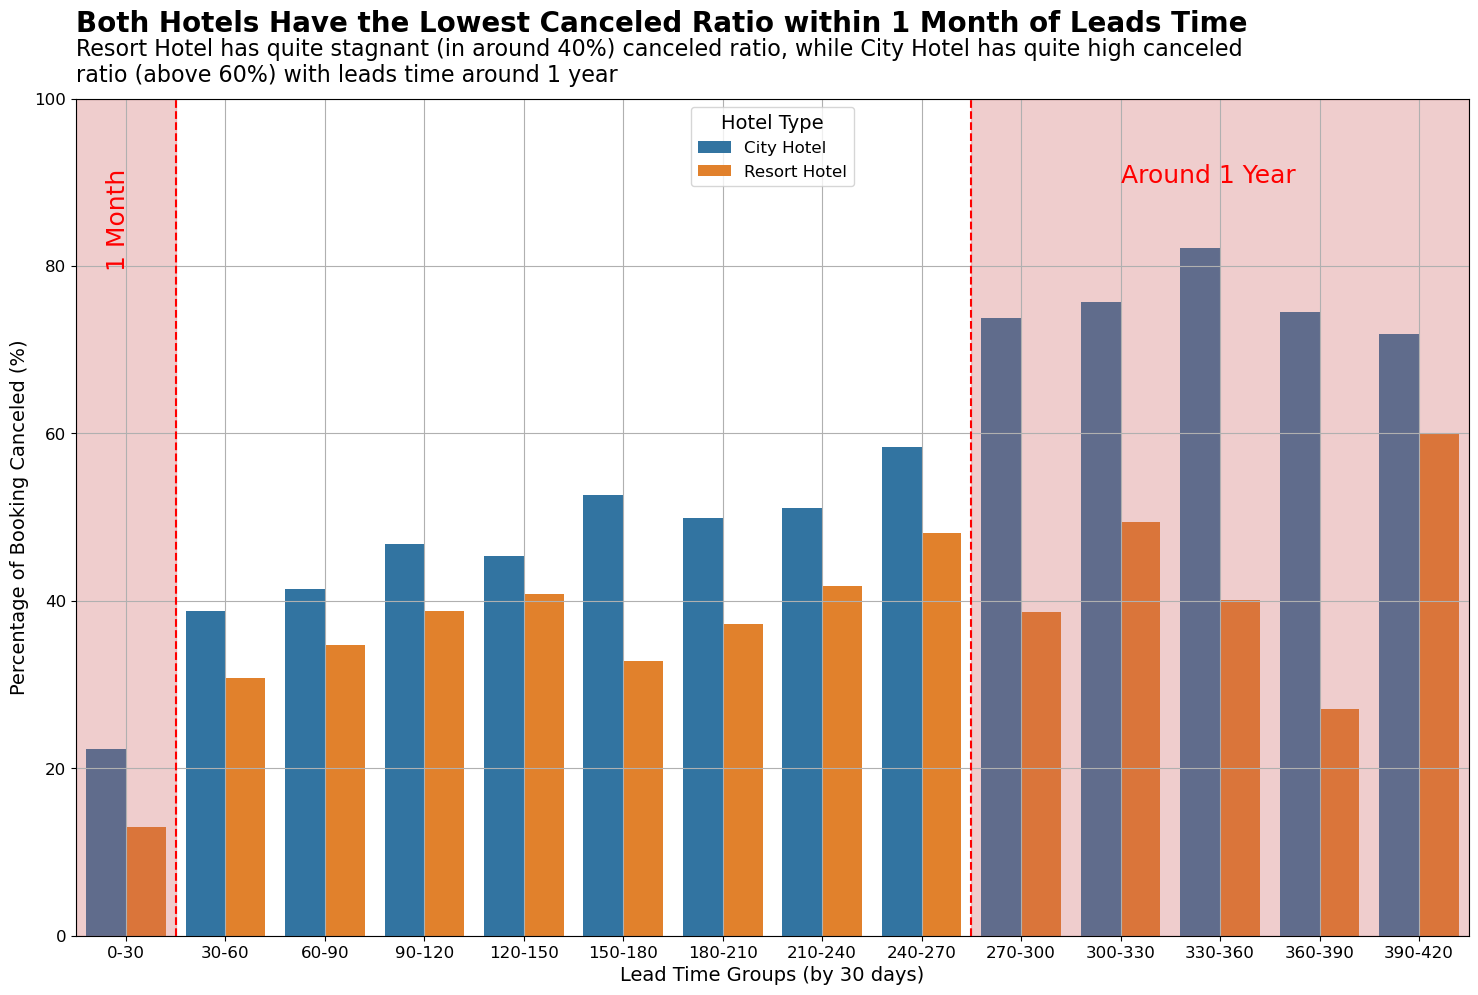

In [47]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.barplot(x='lead_time_categories', y='cancelation_rate', hue='hotel', data=lead) # plot awal menggunakan barplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=12) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) # mengatur title pada y-axis 
plt.ylim(0, 100) # membatasi y-axis
plt.xlim(-0.5,13.5) # membatasi x-axis

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(8.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=108, s="Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year", 
         fontsize=16) # memberikan keterangan tambahan atas judul
 
plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
# plt.savefig('fig/investigate_hotel_business_v03.png', dpi=200); # menyimpan gambar